# trim_saddle_points

In [1]:
import porespy as ps
print(ps.filters.trim_saddle_points.__doc__)


    Removes peaks that were mistakenly identified because they lied on a
    saddle or ridge in the distance transform that was not actually a true
    local peak.

    Parameters
    ----------
    peaks : ndarray
        A boolean image containing True values to mark peaks in the
        distance transform (``dt``)

    dt : ndarray
        The distance transform of the pore space for which the true peaks
        are sought.

    max_iters : int
        The maximum number of iterations to run while eroding the saddle
        points.  The default is 10, which is usually not reached; however,
        a warning is issued if the loop ends prior to removing all saddle
        points.

    Returns
    -------
    image : ND-array
        An image with fewer peaks than the input image

    References
    ----------
    [1] Gostick, J. "A versatile and efficient network extraction algorithm
    using marker-based watershed segmenation".  Physical Review E. (2017)

    


## Import packages

In [2]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage

## Create image and variables:

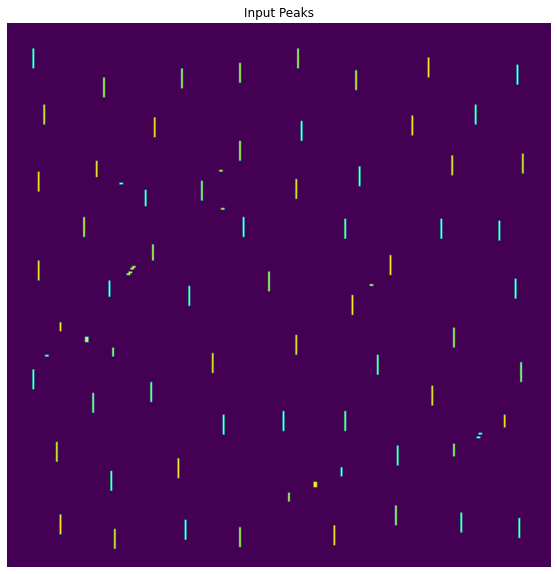

In [3]:
im = np.zeros([300, 300])
im = ps.generators.RSA(im, radius=15, volume_fraction=0.5)
dt = ps.filters.distance_transform_lin(im, axis = 1, mode = "both")
r_max = 4
footprint = None
peaks = ps.filters.find_peaks(dt, r_max=4, footprint=None)
plt.figure(figsize=[10, 10])
plt.axis(False)
plt.title('Input Peaks')
plt.imshow(peaks)

#default values:
max_iters=10
verbose=1

## Apply filter function:
With different parameters

### max_iters

2021-03-29 13:55:15 | WARNING  | porespy.filters.__funcs__:trim_saddle_points:585
--> Maximum number of iterations reached, consider running again with a larger value of max_iters
2021-03-29 13:55:15 | WARNING  | porespy.filters.__funcs__:trim_saddle_points:585
--> Maximum number of iterations reached, consider running again with a larger value of max_iters
2021-03-29 13:55:15 | WARNING  | porespy.filters.__funcs__:trim_saddle_points:585
--> Maximum number of iterations reached, consider running again with a larger value of max_iters
2021-03-29 13:55:15 | WARNING  | porespy.filters.__funcs__:trim_saddle_points:585
--> Maximum number of iterations reached, consider running again with a larger value of max_iters
2021-03-29 13:55:15 | WARNING  | porespy.filters.__funcs__:trim_saddle_points:585
--> Maximum number of iterations reached, consider running again with a larger value of max_iters
2021-03-29 13:55:15 | WARNING  | porespy.filters.__funcs__:trim_saddle_points:585
--> Maximum number

Text(0.5, 1.0, 'max_iters = 2')

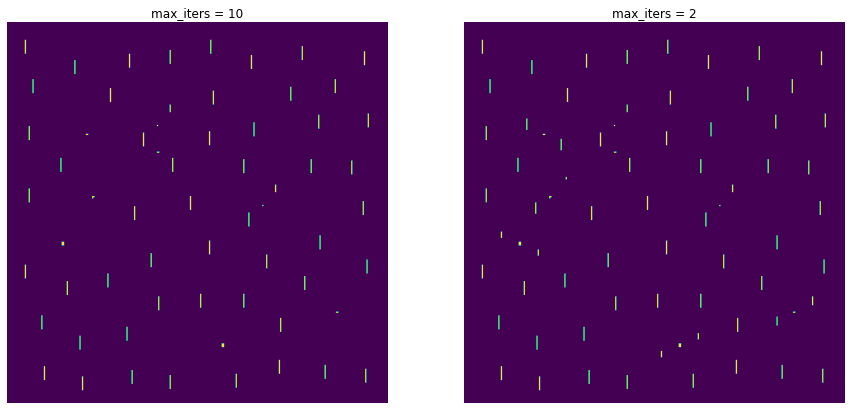

In [4]:
x = ps.filters.trim_saddle_points(peaks=peaks, dt=dt, max_iters=max_iters)
xx = ps.filters.trim_saddle_points(peaks=peaks, dt=dt, max_iters=2)

fig, ax = plt.subplots(1, 2, figsize=[15, 15]);
ax[0].imshow(x);
ax[1].imshow(xx);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('max_iters = 10')
ax[1].set_title('max_iters = 2')